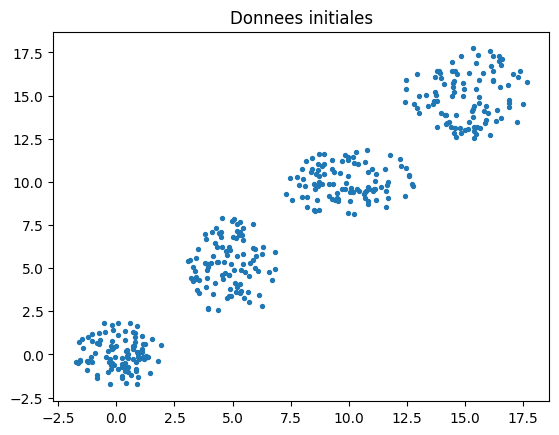

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn.cluster import AgglomerativeClustering

# Parser un fichier de donnees au format arff
# data est un tableau d’exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features (dimension 2)
# Ex : [[-0.499261 , -0.0612356],
# [-1.51369 , 0.265446],
# [-1.60321 , 0.362039], .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster. On retire cette information
path = "./artificial/"

databrut = arff.loadarff(open(path+"spherical_4_3.arff", "r"))
# print(databrut)
datanp = [[x[0],x[1]] for x in databrut[0]]
# print(datanp)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261 , -1.51369 , -1.60321 , ...]
# Ex pour f1 = [-0.0612356 , 0.265446 , 0.362039 , ...]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
plt.show()

## 4. Clustering DBSCAN et HDBSCAN

### 4.1. Intérêts de la méthode DBSCAN

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode DBSCAN devrait identifier correctement les clusters.

- Appliquez la méthode DBSCAN en lui donnant des valeurs "au hasard" pour les paramètres
min-samples et eps et en laissant la métrique de distance à sa valeur par défaut

- Appliquez itérativement la méthode précédente pour déterminer des bonnes valeurs pour les paramètres min-sample et eps

        - Reprenez le ou les critères d’évaluation précédents ;
        - Mesurez le temps de calcul

Le code ci-dessous permet de calculer et d’afficher la valeur de la distance aux k plus proches
voisins pour chaque exemple du jeu de données.

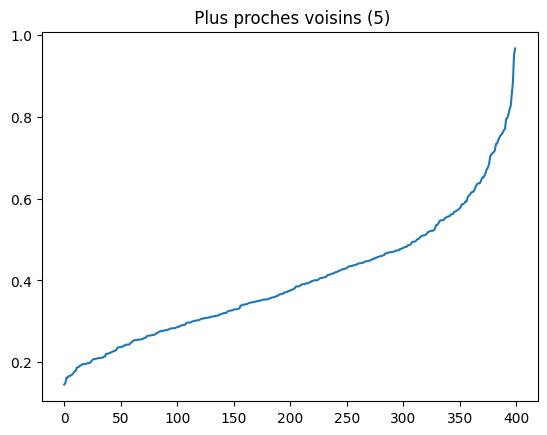

In [2]:
from sklearn.neighbors import NearestNeighbors

# Distances k plus proches voisins
# Donnees dans X
k=6
neigh = NearestNeighbors(n_neighbors = k)
neigh.fit (datanp)

distances,indices = neigh.kneighbors (datanp)

# retirer le point " origine "
newDistances = np.asarray ([np.average ( distances [i][1:]) for i in range (0,distances.shape [0])])
trie = np.sort ( newDistances )
plt.title (" Plus proches voisins (5)")
plt.plot (trie)
plt.show ()

Nombre de clusters trouvés :  4


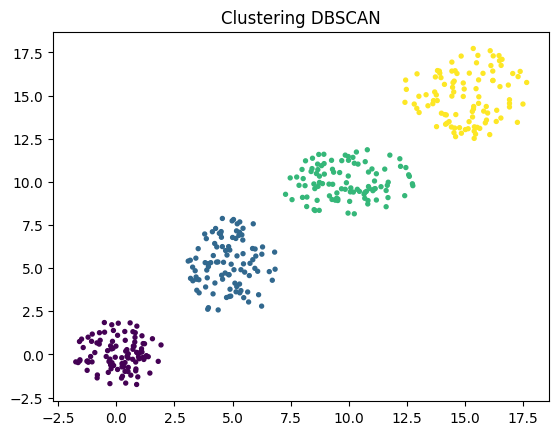

In [3]:
# Appliquez la méthode DBSCAN en lui donnant des valeurs "au hasard" pour les paramètres
# min-samples et eps et en laissant la métrique de distance à sa valeur par défaut
# Affichez le résultat obtenu
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import cluster


model = cluster.DBSCAN(eps=0.92, min_samples=5)
model = model.fit(datanp)

labels = model.labels_
# print("Les labels sont : ", labels)

# donnez le nombre de clusters trouvés par DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Nombre de clusters trouvés : ", n_clusters_)

# Affichage clustering
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering DBSCAN")
plt.show()



 ---------------------------
eps =  0.2 min_samples =  5
Nombre de clusters trouvés :  4
Temps d'exécution :  0.003557920455932617  secondes
Rand score :  0.002083157943717349

 ---------------------------
eps =  0.2 min_samples =  6
Nombre de clusters trouvés :  1
Temps d'exécution :  0.0022230148315429688  secondes
Rand score :  0.0007671052974757633

 ---------------------------
eps =  0.2 min_samples =  7
Nombre de clusters trouvés :  0
Temps d'exécution :  0.0036649703979492188  secondes
Rand score :  0.0

 ---------------------------
eps =  0.2 min_samples =  8
Nombre de clusters trouvés :  0
Temps d'exécution :  0.002685070037841797  secondes
Rand score :  0.0

 ---------------------------
eps =  0.2 min_samples =  9
Nombre de clusters trouvés :  0
Temps d'exécution :  0.005291461944580078  secondes
Rand score :  0.0

 ---------------------------
eps =  0.2 min_samples =  10
Nombre de clusters trouvés :  0
Temps d'exécution :  0.003657102584838867  secondes
Rand score :  0.0

 

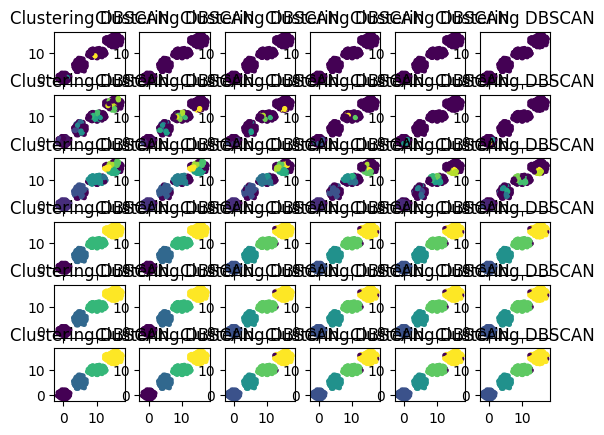

In [4]:
# Appliquez itérativement la méthode précédente pour déterminer des bonnes valeurs pour les paramètres min-sample et eps

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import time

eps_list = [0.20, 0.40, 0.60, 0.95, 0.96, 0.97]
min_samples_list = [5, 6, 7, 8, 9, 10]

i=1
for eps in eps_list:
    for min_samples in min_samples_list:
        print("\n ---------------------------")
        print("eps = ", eps, "min_samples = ", min_samples)
        tps1 = time.time()
        model = cluster.DBSCAN(eps=eps, min_samples=min_samples)
        model = model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        # print("Les labels sont : ", labels)

        # Donnez le nombre de clusters trouvés par DBSCAN
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        print("Nombre de clusters trouvés : ", n_clusters_)
        # Mesurez le temps de calcul
        print("Temps d'exécution : ", tps2 - tps1, " secondes")
        # Mesurez le rand_score
        print("Rand score : ", metrics.adjusted_rand_score(databrut[0]['class'], labels))
        
        # Affichage clustering
        plt.subplot(6,6,i)
        i += 1
        plt.scatter(f0, f1, c=labels, s=8)
        plt.title("Clustering DBSCAN")
plt.show()


### 4.2 Limites de la méthode DBSCAN

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode DBSCAN aura des difficultés pour identifier correctement les clusters. Appliquez la méthode de clustering DBSCAN sur ces jeux de données pour confirmer vos choix


 -------------------------------------
Fichier :  twenty.arff

 ---------------------------
eps =  0.2 min_samples =  5
Nombre de clusters trouvés :  39
Temps d'exécution :  0.00605010986328125  secondes
Rand score :  0.012557870099615764

 ---------------------------
eps =  0.2 min_samples =  6
Nombre de clusters trouvés :  20
Temps d'exécution :  0.005269050598144531  secondes
Rand score :  0.00696097411556804

 ---------------------------
eps =  0.2 min_samples =  7
Nombre de clusters trouvés :  10
Temps d'exécution :  0.0038313865661621094  secondes
Rand score :  0.004077304358471977

 ---------------------------
eps =  0.2 min_samples =  8
Nombre de clusters trouvés :  5
Temps d'exécution :  0.00673365592956543  secondes
Rand score :  0.0025254295637327224

 ---------------------------
eps =  0.2 min_samples =  9
Nombre de clusters trouvés :  2
Temps d'exécution :  0.005137205123901367  secondes
Rand score :  0.0012847467211139292

 ---------------------------
eps =  0.2 min_samp

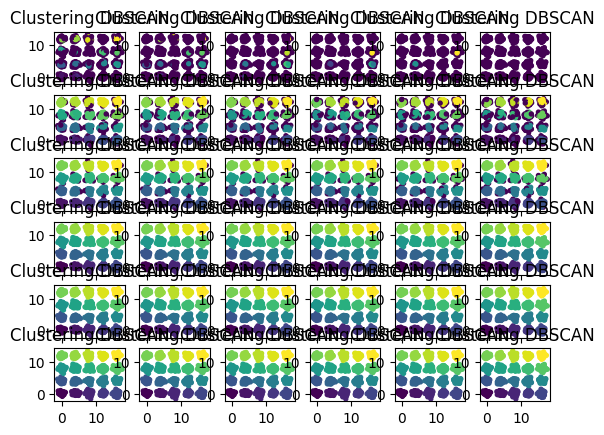


 -------------------------------------
Fichier :  spiral.arff

 ---------------------------
eps =  0.2 min_samples =  5
Nombre de clusters trouvés :  2
Temps d'exécution :  0.006109952926635742  secondes
Rand score :  0.5740061108978344

 ---------------------------
eps =  0.2 min_samples =  6
Nombre de clusters trouvés :  2
Temps d'exécution :  0.003918170928955078  secondes
Rand score :  0.16551791282503397

 ---------------------------
eps =  0.2 min_samples =  7
Nombre de clusters trouvés :  2
Temps d'exécution :  0.004096508026123047  secondes
Rand score :  0.16227147828238872

 ---------------------------
eps =  0.2 min_samples =  8
Nombre de clusters trouvés :  2
Temps d'exécution :  0.004415750503540039  secondes
Rand score :  0.052177700584038665

 ---------------------------
eps =  0.2 min_samples =  9
Nombre de clusters trouvés :  2
Temps d'exécution :  0.00400853157043457  secondes
Rand score :  0.049466694730584786

 ---------------------------
eps =  0.2 min_samples =  1

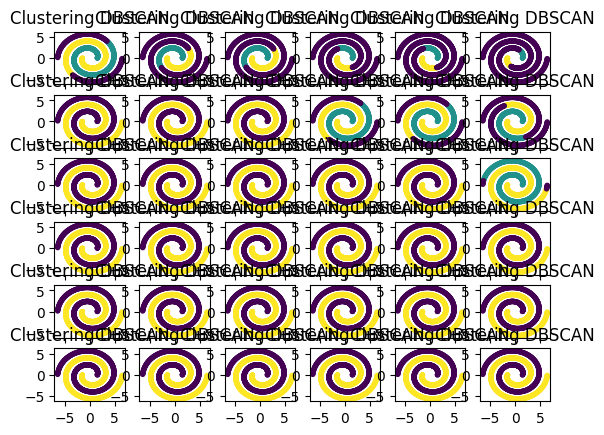

In [5]:
# Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode DBSCAN aura des difficultés pour identifier correctement les clusters. Appliquez la méthode de clustering DBSCAN sur ces jeux de données pour confirmer vos choix

dic = {"twenty.arff": [20, [1,10,100]], "spiral.arff": [2, [1,10,100]], "compound.arff": [6, [1,10,100]]}

file_list = ["twenty.arff", "spiral.arff"]
eps_list = [0.20, 0.40, 0.60, 0.95, 0.96, 0.97]
min_samples_list = [5, 6, 7, 8, 9, 10]

for file in file_list:
    print("\n -------------------------------------")
    print("Fichier : ", file)
    databrut = arff.loadarff(open(path+file, "r"))
    datanp = [[x[0],x[1]] for x in databrut[0]]
    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    i=1
    for eps in eps_list:
        for min_samples in min_samples_list:
            print("\n ---------------------------")
            print("eps = ", eps, "min_samples = ", min_samples)
            tps1 = time.time()
            model = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            model = model.fit(datanp)
            tps2 = time.time()

            labels = model.labels_
            # print("Les labels sont : ", labels)

            # Donnez le nombre de clusters trouvés par DBSCAN
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            print("Nombre de clusters trouvés : ", n_clusters_)
            # Mesurez le temps de calcul
            print("Temps d'exécution : ", tps2 - tps1, " secondes")
            # Mesurez le rand_score
            print("Rand score : ", metrics.adjusted_rand_score(databrut[0]['class'], labels))
            
            # Affichage clustering
            plt.subplot(6,6,i)
            i += 1
            plt.scatter(f0, f1, c=labels, s=8)
            plt.title("Clustering DBSCAN")
    plt.show()

### 4.3 Comparaison avec la méthode HDBSCAN

Le package Python de cette méthode est accessible ici. Récupérer le package avec la commande pip install. La méthode HDBSCAN est connue pour être insensible à la variabilité de densité dans les données.

Reprenez les expérimentations effectuées avec DBSCAN. Comparez les résultats de ces deux méthodes. Arrivez-vous à retrouver les qualités et les limites de ces deux méthodes sur les jeux de données sélectionnés ? Y-at-il des diférences de performances (en temps de calcul) ?


 -------------------------------------
Fichier :  compound.arff

 ---------------------------
eps =  1.54 
min_samples =  5
Nombre de clusters trouvés :  6
Temps d'exécution :  0.010314702987670898  secondes
Rand score :  0.828285194028265


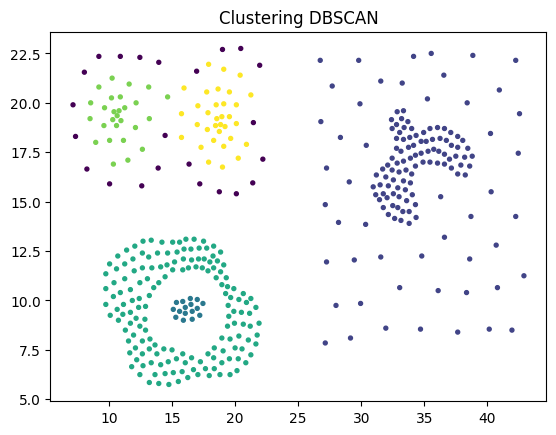

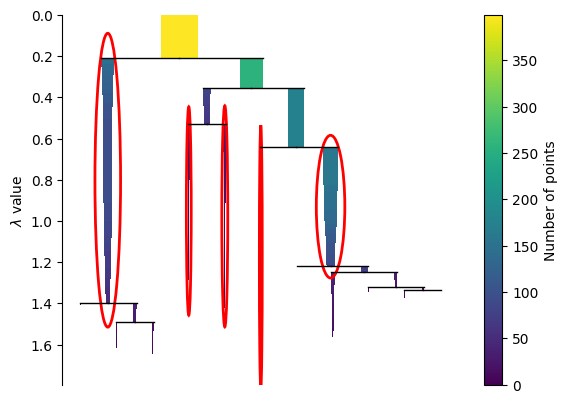

In [6]:
# Reprenez les expérimentations effectuées avec DBSCAN en utilisant la méthode HDBSCAN. Comparez les résultats obtenus avec ceux de DBSCAN

import hdbscan
import sns

file = "compound.arff"
eps_list = [0.20, 0.40, 0.60, 0.95, 0.96, 0.97]
min_samples_list = [5, 6, 7, 8, 9, 10]


print("\n -------------------------------------")
print("Fichier : ", file)
databrut = arff.loadarff(open(path+file, "r"))
datanp = [[x[0],x[1]] for x in databrut[0]]
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

i=1
eps = 1.54
min_samples = 5

print("\n ---------------------------")
print("eps = ", eps, "\nmin_samples = ", min_samples)
tps1 = time.time()
model = hdbscan.HDBSCAN(min_samples=min_samples)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
# print("Les labels sont : ", labels)

# Donnez le nombre de clusters trouvés par DBSCAN
n_clusters_ = len(set(labels))
print("Nombre de clusters trouvés : ", n_clusters_)
# Mesurez le temps de calcul
print("Temps d'exécution : ", tps2 - tps1, " secondes")
# Mesurez le rand_score
print("Rand score : ", metrics.adjusted_rand_score(databrut[0]['class'], labels))

# Affichage clustering
i += 1
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering DBSCAN")

plt.show()


# Affichage arbre d'accessibilité
model.condensed_tree_.plot(select_clusters=True)
plt.show()





 -------------------------------------
Fichier :  twenty.arff

 ---------------------------
eps =  0.2 
min_samples =  5
Nombre de clusters trouvés :  20
Temps d'exécution :  0.02099013328552246  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  6
Nombre de clusters trouvés :  20
Temps d'exécution :  0.01690077781677246  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  7
Nombre de clusters trouvés :  20
Temps d'exécution :  0.01842331886291504  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  8
Nombre de clusters trouvés :  20
Temps d'exécution :  0.016315698623657227  secondes
Rand score :  0.9978754224327473

 ---------------------------
eps =  0.2 
min_samples =  9
Nombre de clusters trouvés :  20
Temps d'exécution :  0.015860795974731445  secondes
Rand score :  0.9989474227662235

 ---------------------------
eps =  0.2 
min_samples =  10
Nombre de clusters trouvés :  20
Temps d

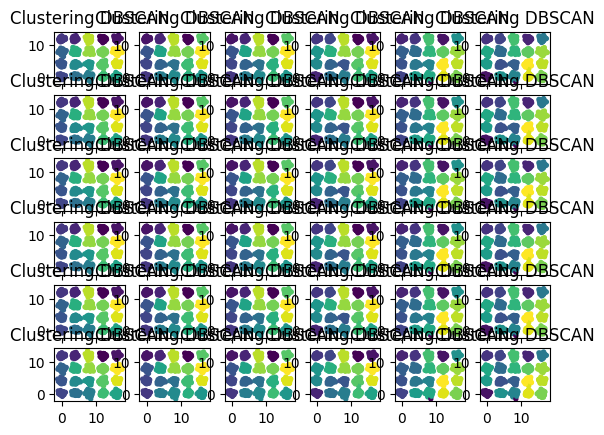


 -------------------------------------
Fichier :  spiral.arff

 ---------------------------
eps =  0.2 
min_samples =  5
Nombre de clusters trouvés :  2
Temps d'exécution :  0.02706122398376465  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  6
Nombre de clusters trouvés :  2
Temps d'exécution :  0.017667055130004883  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  7
Nombre de clusters trouvés :  2
Temps d'exécution :  0.024989843368530273  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  8
Nombre de clusters trouvés :  2
Temps d'exécution :  0.019040346145629883  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  9
Nombre de clusters trouvés :  2
Temps d'exécution :  0.01629924774169922  secondes
Rand score :  1.0

 ---------------------------
eps =  0.2 
min_samples =  10
Nombre de clusters trouvés :  2
Temps d'exécution :  0.015285730361938477 

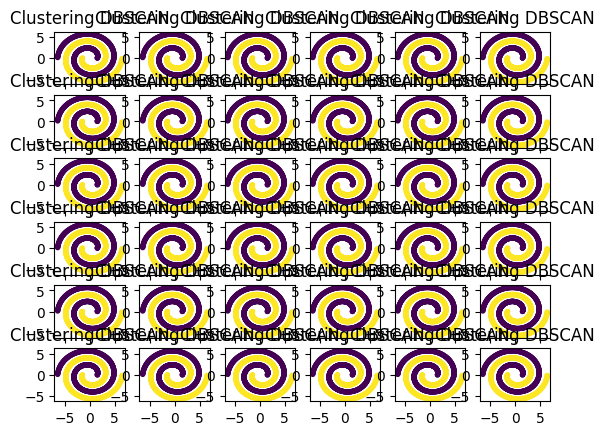


 -------------------------------------
Fichier :  compound.arff

 ---------------------------
eps =  0.2 
min_samples =  5
Nombre de clusters trouvés :  6
Temps d'exécution :  0.019876718521118164  secondes
Rand score :  0.828285194028265

 ---------------------------
eps =  0.2 
min_samples =  6
Nombre de clusters trouvés :  6
Temps d'exécution :  0.013025045394897461  secondes
Rand score :  0.8238785191273189

 ---------------------------
eps =  0.2 
min_samples =  7
Nombre de clusters trouvés :  5
Temps d'exécution :  0.010364532470703125  secondes
Rand score :  0.7579834712969586

 ---------------------------
eps =  0.2 
min_samples =  8
Nombre de clusters trouvés :  5
Temps d'exécution :  0.008907556533813477  secondes
Rand score :  0.7572470175523969

 ---------------------------
eps =  0.2 
min_samples =  9
Nombre de clusters trouvés :  5
Temps d'exécution :  0.010185956954956055  secondes
Rand score :  0.7662214812200155

 ---------------------------
eps =  0.2 
min_samples = 

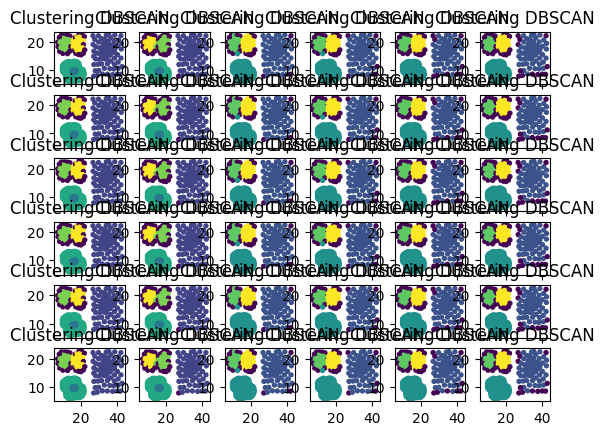

In [7]:
# Reprenez les expérimentations effectuées avec DBSCAN en utilisant la méthode HDBSCAN. Comparez les résultats obtenus avec ceux de DBSCAN

import hdbscan

file_list = ["twenty.arff", "spiral.arff", "compound.arff"]
eps_list = [0.20, 0.40, 0.60, 0.95, 0.96, 1.54]
min_samples_list = [5, 6, 7, 8, 9, 10]

for file in file_list:
    print("\n -------------------------------------")
    print("Fichier : ", file)
    databrut = arff.loadarff(open(path+file, "r"))
    datanp = [[x[0],x[1]] for x in databrut[0]]
    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    i=1
    for eps in eps_list:
        for min_samples in min_samples_list:
            print("\n ---------------------------")
            print("eps = ", eps, "\nmin_samples = ", min_samples)
            tps1 = time.time()
            model = hdbscan.HDBSCAN(min_samples=min_samples)
            model = model.fit(datanp)
            tps2 = time.time()

            labels = model.labels_
            # print("Les labels sont : ", labels)

            # Donnez le nombre de clusters trouvés par DBSCAN
            if file == "compound.arff":
                n_clusters_ = len(set(labels))
            else:
                n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            print("Nombre de clusters trouvés : ", n_clusters_)
            # Mesurez le temps de calcul
            print("Temps d'exécution : ", tps2 - tps1, " secondes")
            # Mesurez le rand_score
            print("Rand score : ", metrics.adjusted_rand_score(databrut[0]['class'], labels))
            
            # Affichage clustering
            plt.subplot(6,6,i)
            i += 1
            plt.scatter(f0, f1, c=labels, s=8)
            plt.title("Clustering DBSCAN")

    plt.show()



### 5. Evaluation

– Partie 1 : Points forts et points faibles identifiés pour les différentes méthodes de clustering étudiées 

– Partie 2 : Etude et Analyse comparative de méthodes de clustering sur de nouvelles données fournies

– Conclusion (0,5 page)


#### **Partie 1 :** 

##### **Pour le k-means :** 
**Les points forts sont :**

- Facilité de mise en œuvre et d'interprétation des résultats.
 
- Efficace pour les ensembles de données de grande taille.

- Donne des résultats précis lorsque les clusters sont globalement sphériques et de taille similaire.

**Les points faibles sont :**

- Sensible aux valeurs aberrantes (outliers) qui peuvent fausser les résultats.

- Requiert une spécification préalable du nombre de clusters (k).

- Peut converger vers des minima locaux, ce qui signifie que les résultats peuvent varier selon l'initialisation.

##### **Pour le k-medoids :**
**Les points forts sont :**

- Robuste face aux valeurs aberrantes, car il utilise les médianes des clusters plutôt que les moyennes.

- Peut être utilisé avec des mesures de distance non euclidiennes.

- Ne nécessite pas de spécifier le nombre de clusters à l'avance.

**Les points faibles sont :**

- Moins efficace pour les ensembles de données de grande taille.
  
- Le calcul de la médiane des clusters peut être coûteux en termes de temps de calcul.
  
- Peut être sensible au choix des médoides initiaux.

##### **Pour le clustering agglomératif :** 
**Les points forts sont :**

- Ne nécessite pas de spécifier le nombre de clusters à l'avance.

- Peut gérer des ensembles de données de grande taille.

- Permet d'observer une hiérarchie de clusters grâce au dendrogramme.

**Les points faibles sont :**

- Peut être coûteux en termes de temps de calcul, en particulier pour de grandes bases de données.

- La fusion de clusters peut être sensible à la métrique de distance utilisée.

- Les résultats peuvent être difficiles à interpréter lorsqu'il y a une grande quantité de clusters.

##### **Pour le DBSCAN :** 
**Les points forts sont :**

- Capable d'identifier des clusters de forme arbitraire et de taille variable.

- Robuste face au bruit et aux valeurs aberrantes.

- Nécessite peu de paramètres d'entrée, comme le nombre de clusters ou la taille des clusters.

**Les points faibles sont :**

- Sensible au choix des paramètres de distance et de densité.

##### **Pour le HDBSCAN :** 
**Les points forts sont :**

- Capable de trouver des clusters de densité variable et de forme arbitraire.

- Robuste face au bruit et aux valeurs aberrantes.

- Ne nécessite pas de spécifier le nombre de clusters à l'avance.

**Les points faibles sont :**

- Requiert le choix d'un paramètre de densité (epsilon) et d'un paramètre de taille de cluster (min_samples).

- Peut être coûteux en termes de temps de calcul pour de grandes bases de données.



#### **Partie 2:Etude et Analyse comparative de méthodes de clustering sur de nouvelles données fournies**

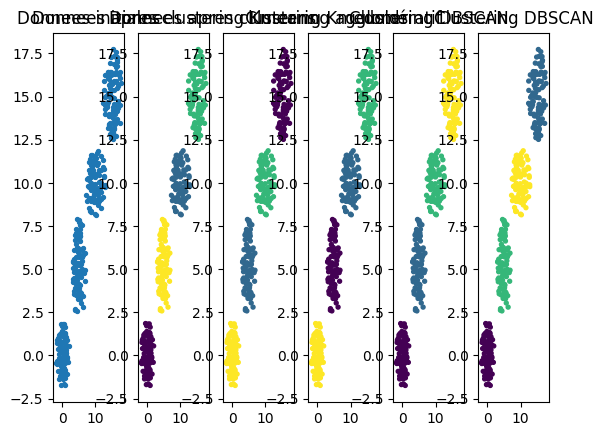

In [8]:
# Etude et Analyse comparative de méthodes de clustering sur de nouvelles données fournies

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

path = "./artificial/"

databrut = arff.loadarff(open(path+"spherical_4_3.arff", "r"))
datanp = [[x[0],x[1]] for x in databrut[0]]

# Affichage en 2D

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,6,1)
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")




#############################################
#####k means######
#############################################

import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
#
# Les donnees sont dans datanp (2 dimensions)
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#

# print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()
k=4
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,6,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
# print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


############################################
##### k medoids######
############################################

distmatrix = euclidean_distances(datanp)
fp = kmedoids.fasterpam(distmatrix , k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
# print("Loss with FasterPAM: ", fp.loss)

plt.subplot(1,6,3)
plt.scatter(f0 , f1 , c=labels_kmed , s=8)
plt.title("Donnees apres clustering Kmedoids")

# print("nb clusters =",k,", nb iter =",iter_kmed , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


############################################
###### clustering agglo######
############################################

tps1 = time.time ()
model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_


# Affichage clustering
plt.subplot(1,6,4)
plt.scatter (f0,f1 , c=labels , s=8 )
plt.title (" Clustering agglomératif ")

# print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")


############################################
###### dbscan#####
############################################

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

model = cluster.DBSCAN(eps=0.92, min_samples=5)
model = model.fit(datanp)

labels = model.labels_
# print("Les labels sont : ", labels)

# donnez le nombre de clusters trouvés par DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print("Nombre de clusters trouvés : ", n_clusters_)

# Affichage clustering
plt.subplot(1,6,5)
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering DBSCAN")


###########################################
##### hdbscan#####
###########################################

import hdbscan

model = hdbscan.HDBSCAN(min_samples=5)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
# print("Les labels sont : ", labels)

# Donnez le nombre de clusters trouvés par DBSCAN
n_clusters_ = len(set(labels))
# print("Nombre de clusters trouvés : ", n_clusters_)

# Affichage clustering
plt.subplot(1,6,6)
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering DBSCAN")

plt.show()

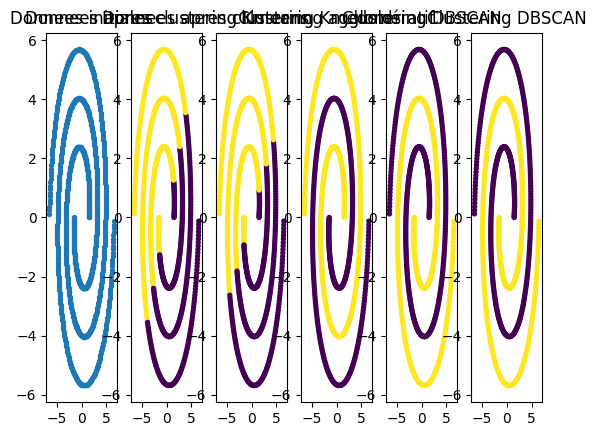

In [9]:
# Etude et Analyse comparative de méthodes de clustering sur de nouvelles données fournies

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn import metrics
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

path = "./artificial/"

databrut = arff.loadarff(open(path+"spiral.arff", "r"))
datanp = [[x[0],x[1]] for x in databrut[0]]

# Affichage en 2D

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.subplot(1,6,1)
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")




#############################################
#####k means######
#############################################

import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
#
# Les donnees sont dans datanp (2 dimensions)
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
#

# print("Appel KMeans pour une valeur fixee de k ")
tps1 = time.time()
k=2
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init='auto')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.subplot(1,6,2)
plt.scatter(f0 , f1 , c=labels , s=8)
plt.title("Donnees apres clustering Kmeans")
# print("nb clusters =",k,", nb iter =",iteration , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


############################################
##### k medoids######
############################################

distmatrix = euclidean_distances(datanp)
fp = kmedoids.fasterpam(distmatrix , k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
# print("Loss with FasterPAM: ", fp.loss)

plt.subplot(1,6,3)
plt.scatter(f0 , f1 , c=labels_kmed , s=8)
plt.title("Donnees apres clustering Kmedoids")

# print("nb clusters =",k,", nb iter =",iter_kmed , ", runtime = ", round((tps2 - tps1)*1000 ,2),"ms")


############################################
###### clustering agglo######
############################################

tps1 = time.time ()
model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_


# Affichage clustering
plt.subplot(1,6,4)
plt.scatter (f0,f1 , c=labels , s=8 )
plt.title (" Clustering agglomératif ")

# print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")


############################################
###### dbscan#####
############################################

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

model = cluster.DBSCAN(eps=1.54, min_samples=5)
model = model.fit(datanp)

labels = model.labels_
# print("Les labels sont : ", labels)

# donnez le nombre de clusters trouvés par DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print("Nombre de clusters trouvés : ", n_clusters_)

# Affichage clustering
plt.subplot(1,6,5)
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering DBSCAN")


###########################################
##### hdbscan#####
###########################################

import hdbscan

model = hdbscan.HDBSCAN(min_samples=5)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
# print("Les labels sont : ", labels)

# Donnez le nombre de clusters trouvés par DBSCAN
n_clusters_ = len(set(labels))
# print("Nombre de clusters trouvés : ", n_clusters_)

# Affichage clustering
plt.subplot(1,6,6)
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Clustering DBSCAN")

plt.show()